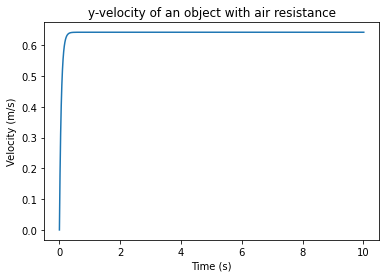

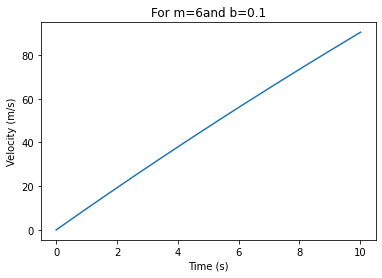

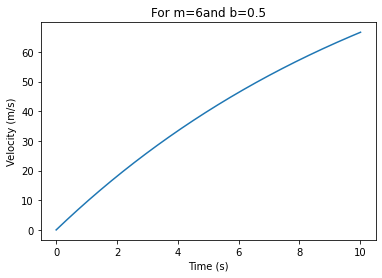

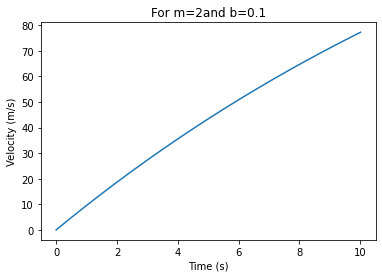

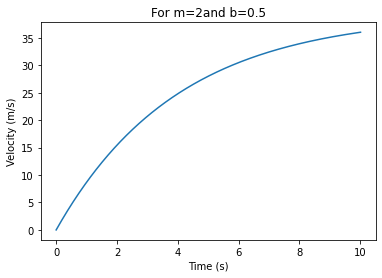

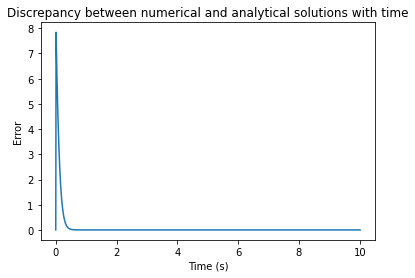

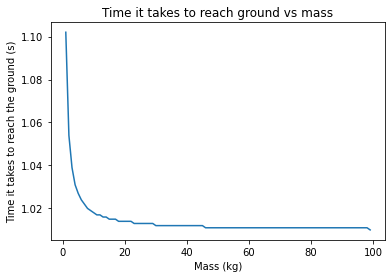

In [43]:
import matplotlib.pyplot as plt
import math
import numpy as np

# setting parameters
g = 9.81
D = 1.e-4
volume = (4.0/3.0) * math.pi * (D/2.0)**3
rho = 2000 # given in the exercise
m = rho * volume
B = 1.6e-4
b = B*D
dt = 0.01
tmax = 10 #seconds

# Determining the velocity of an object dropped straight down wrt time
# initial conditions
t = 0
vy = 0.00001

#creating lists for what will be plotted
time = [t]
velocity = [vy]
velocity_analytical = [vy] #To be used later

#Going through the iterative procedure
while(t<tmax):
    dvy = g*dt - (b/m)*vy*dt
    vy = vy + dvy
    t = t + dt
    time.append(t)
    velocity.append(vy)
    
    # analytical solution to be used later
    formula = (m*g/b)*(1.0 - math.exp(-b*t/m))
    velocity_analytical.append(formula)

#plotting the graph
plt.figure()
plt.plot(time,velocity,'-')
#plt.plot(time,velocity_analytical)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title("y-velocity of an object with air resistance")
plt.show()

print("The next four plots show how velocity changes with b and m")

#defining different m's and b's
mrange = [6,2] 
brange = [0.1,0.5]

for i in mrange: 
    for b in brange:
        t = 0
        vy = 0
        velocity_r = [vy]
        time = [t]
        while(t<tmax):
            dvy = g*dt - (b/i)*vy*dt
            vy = vy + dvy

            t = t + dt
            time.append(t)
            velocity_r.append(vy)

        plt.figure()
        plt.plot(time,velocity_r,'-')
        plt.xlabel('Time (s)')
        plt.ylabel('Velocity (m/s)')
        plt.title("For m="+str(i)+"and b="+str(b))
        plt.show()    

#plotting the error between numerical solution and analytical wrt time:
#the values from numerical and analytical have already been found above

error = [] #defining a list

#for each time point, use the formula to find error between analytical and numerical
for er in range(len(velocity)):
    error.append(np.abs((velocity[er]-velocity_analytical[er])/velocity_analytical[er])*100)

plt.figure()
plt.plot(time,error,'-')
plt.xlabel('Time (s)')
plt.ylabel('Error')
plt.title("Discrepancy between numerical and analytical solutions with time")
plt.show()    


#Plotting how length of time to reach the ground correlates with mass

#initial conditions & list set-up
Ground = 0
mrthe2nd = np.arange(1,100) #mass range the second
groundtime = []
dt = 0.001

for m in mrthe2nd:  
    yw = 5 #initial height of the object
    vyw = 0 # initial velocity of the mass
    tw = 0
    while (yw >=Ground):
        dvyw = -g*dt - (b/m)*vyw*dt
        vyw = vyw + dvyw
        dyw = vyw * dt
        yw = yw + dyw
        tw = tw + dt
    groundtime.append(tw)    

plt.figure()
plt.plot(mrthe2nd,groundtime,'-')
plt.xlabel('Mass (kg)')
plt.ylabel('Time it takes to reach the ground (s)')
plt.title("Time it takes to reach ground vs mass")
plt.show()    
